### Student Information
Name: 潘婷蓁

Student ID: 111034508

GitHub ID: sonepanpan

Kaggle name: helloworld111034508

Kaggle private scoreboard snapshot:

[Snapshot](pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

In [13]:
from google.colab import drive
drive.mount('/content/drive')
import os
%cd /content/drive/MyDrive/DataMining/DM2023-Lab2-Master

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DataMining/DM2023-Lab2-Master


# Part 1 Take Home Exercise

In [14]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
## ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import numpy as np

count_vect = CountVectorizer(tokenizer=nltk.word_tokenize)
word_freq_train = count_vect.fit_transform(train_df.text)
term_frequencies_train = np.asarray(word_freq_train.sum(axis=0))[0]
L = np.flip(np.argsort(term_frequencies_train)[-30:])
print(count_vect.get_feature_names_out()[L[0]], term_frequencies_train[L[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# 3932


### answer here

<ipython-input-5-18200693e05b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticks(), size = 30)


[Text(0, 0.0, '0.0'),
 Text(0, 500.0, '500.0'),
 Text(0, 1000.0, '1000.0'),
 Text(0, 1500.0, '1500.0'),
 Text(0, 2000.0, '2000.0'),
 Text(0, 2500.0, '2500.0'),
 Text(0, 3000.0, '3000.0'),
 Text(0, 3500.0, '3500.0'),
 Text(0, 4000.0, '4000.0'),
 Text(0, 4500.0, '4500.0')]

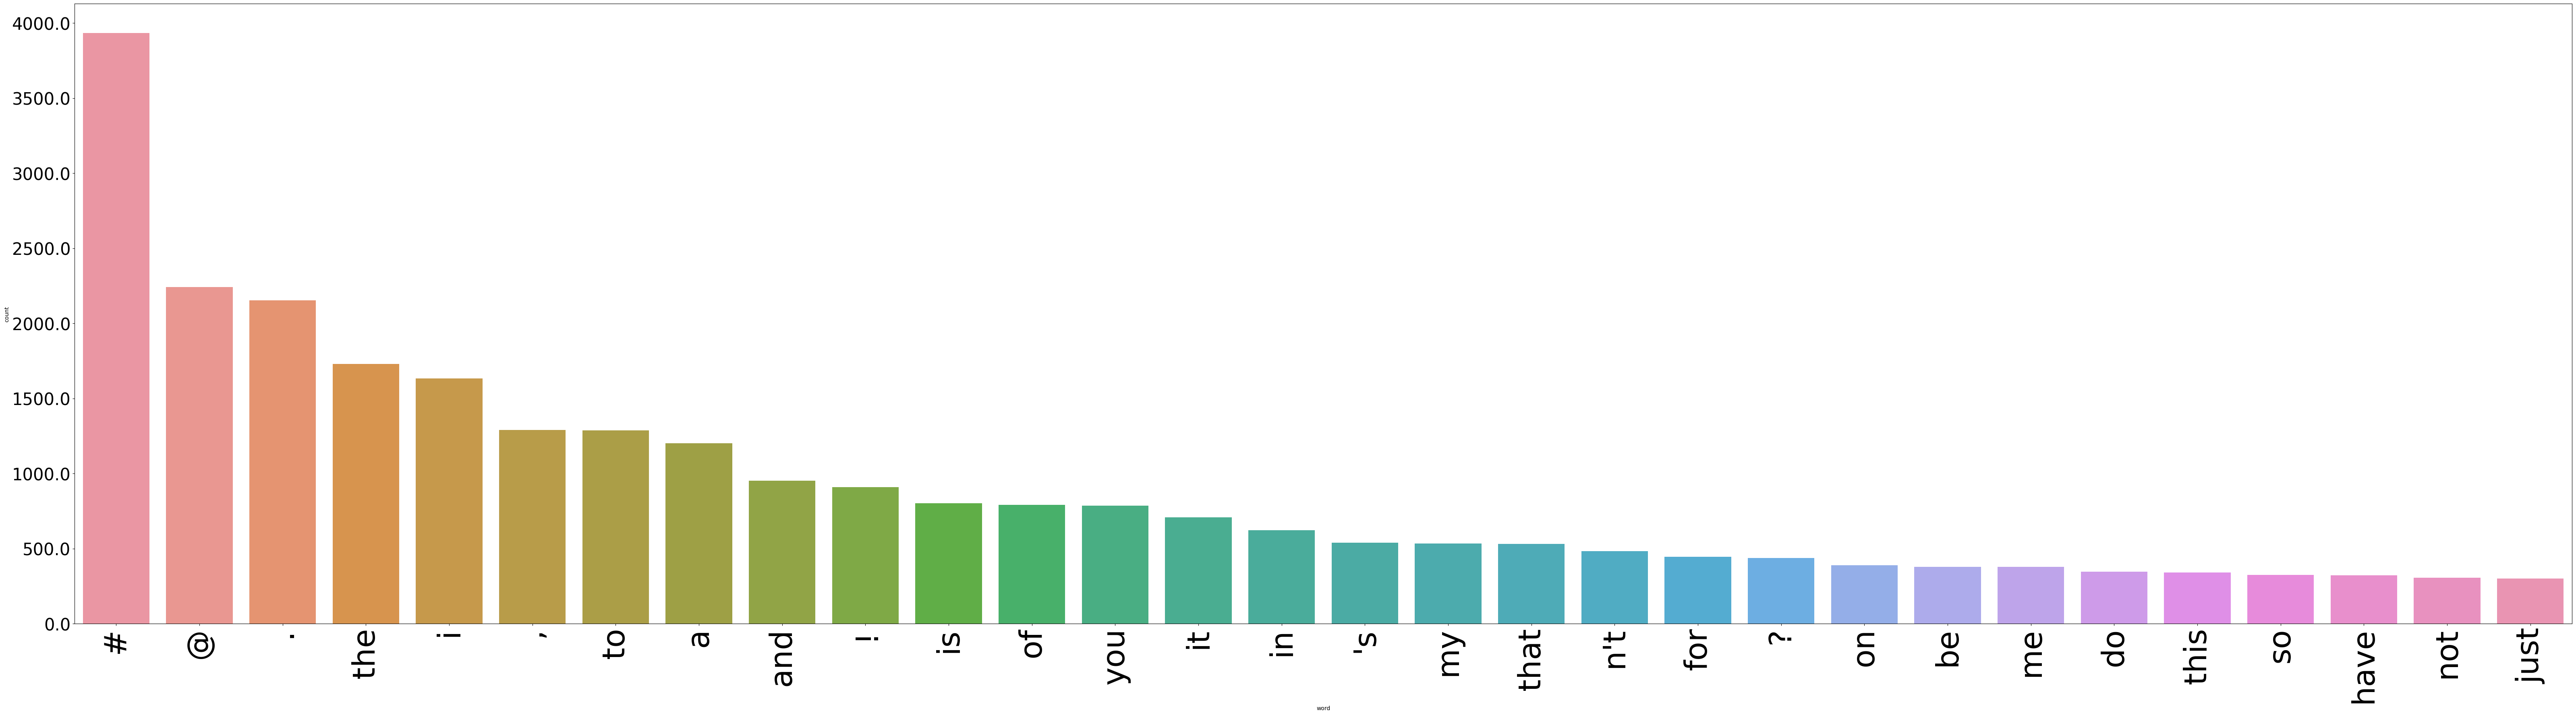

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_count = pd.DataFrame(zip(count_vect.get_feature_names_out(), term_frequencies_train),
             columns=['word', 'count'])
df_count_30=df_count.loc[list(L)]
plt.subplots(figsize=(80, 20))
g = sns.barplot(y=df_count_30['count'],
            x=df_count_30['word'])
g.set_xticklabels(df_count_30['word'], fontsize=55, rotation = 90)
g.set_yticklabels(g.get_yticks(), size = 30)

In [ ]:
count_vect = CountVectorizer(tokenizer=nltk.word_tokenize)
word_freq_test = count_vect.fit_transform(test_df.text)
term_frequencies_test = np.asarray(word_freq_test.sum(axis=0))[0]
L = np.flip(np.argsort(term_frequencies_test)[-30:])
print(count_vect.get_feature_names_out()[L[0]], term_frequencies_test[L[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# 359


<ipython-input-7-a90717f4a175>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticks(), size = 30)


[Text(0, 0.0, '0.0'),
 Text(0, 50.0, '50.0'),
 Text(0, 100.0, '100.0'),
 Text(0, 150.0, '150.0'),
 Text(0, 200.0, '200.0'),
 Text(0, 250.0, '250.0'),
 Text(0, 300.0, '300.0'),
 Text(0, 350.0, '350.0'),
 Text(0, 400.0, '400.0')]

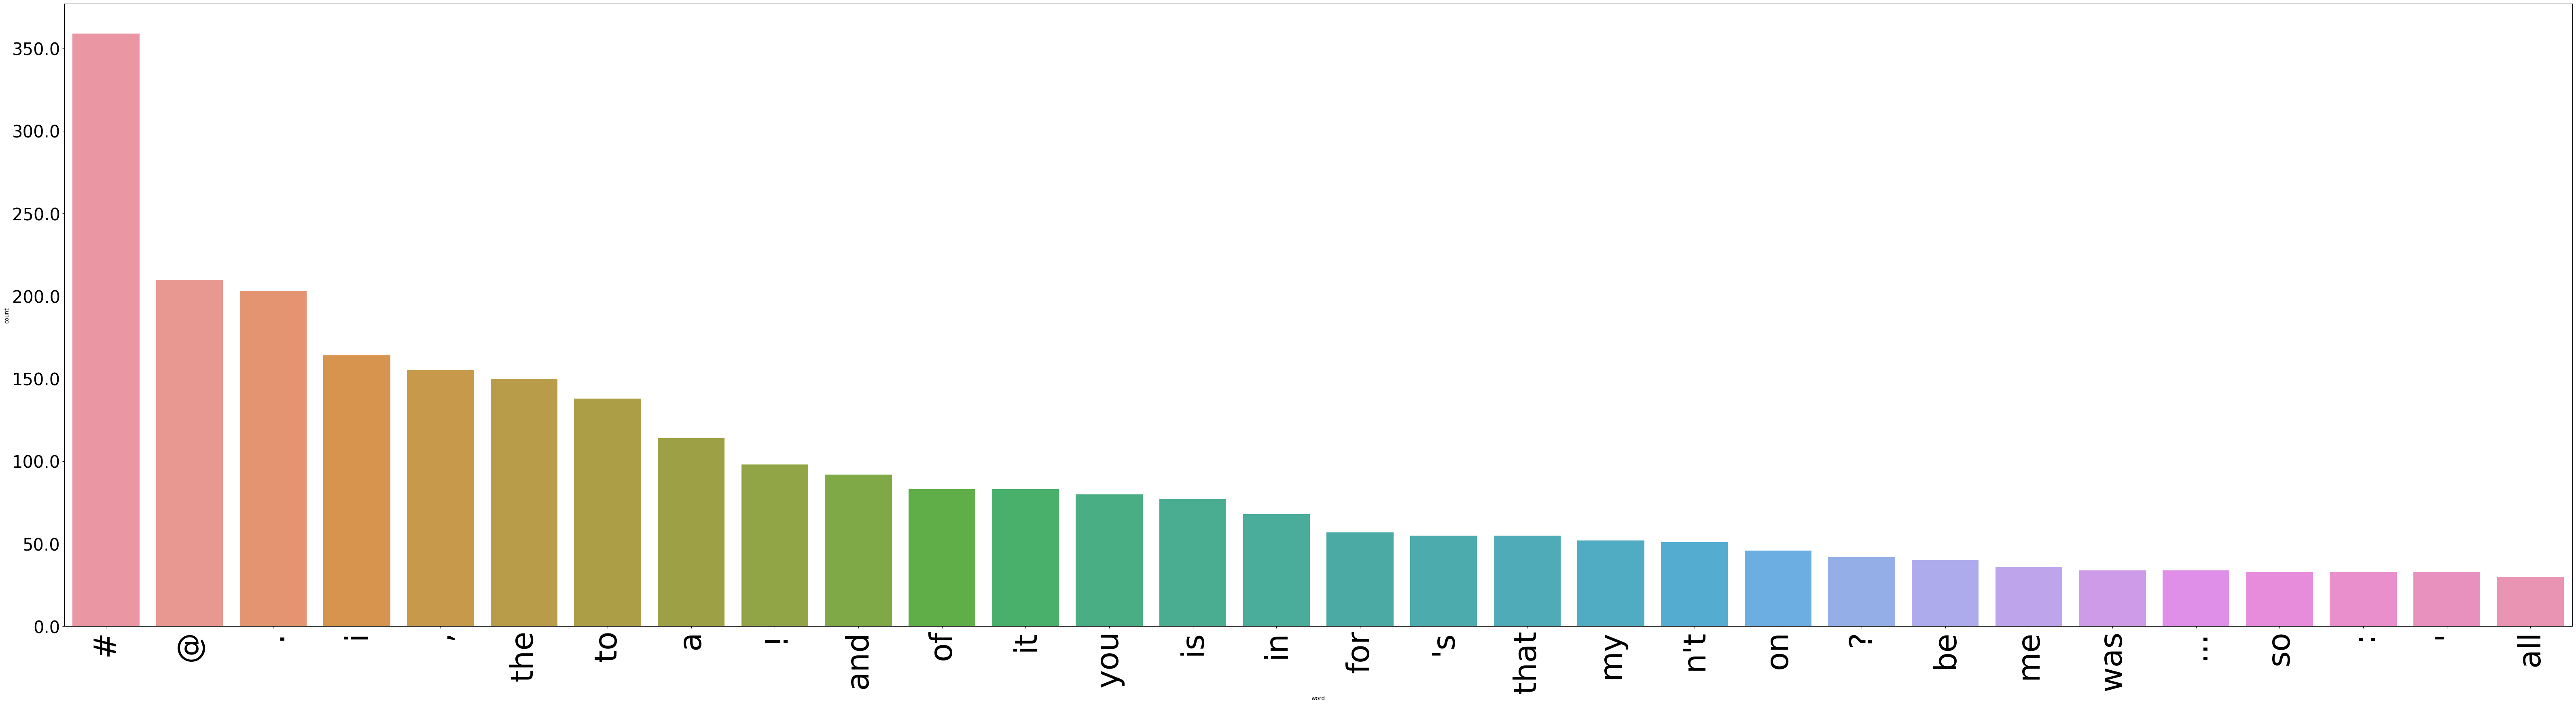

In [ ]:
df_count = pd.DataFrame(zip(count_vect.get_feature_names_out(), term_frequencies_test),
             columns=['word', 'count'])
df_count_30=df_count.loc[list(L)]
plt.subplots(figsize=(80, 20))
g = sns.barplot(y=df_count_30['count'],
            x=df_count_30['word'])
g.set_xticklabels(df_count_30['word'], fontsize=55, rotation = 90)
g.set_yticklabels(g.get_yticks(), size = 30)

---
## ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000,tokenizer=nltk.word_tokenize)
X_tfidf = vectorizer.fit_transform(train_df['text'])
vectorizer.get_feature_names_out()[100:110]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## ** >>> Exercise 3 (Take home): **  

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'joy', 'joy', 'sadness', 'joy', 'sadness', 'joy',
       'joy', 'joy'], dtype=object)

Can you interpret the results above? What do they mean?

A: model tends to predict "fear" more than other classes

### answer here

In [ ]:
# Answer here
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



| criterion | formula | comparison |
| :-----| :----: | :----: |
| precision | TP / (TP + FP) | joy > sadness > anger = fear |
| recall | TP / (TP + FN) | joy > fear > anger > sadness |
| f1-score | 2 * Precision * Recall / (Precision + Recall) | joy > anger = fear = sadness |

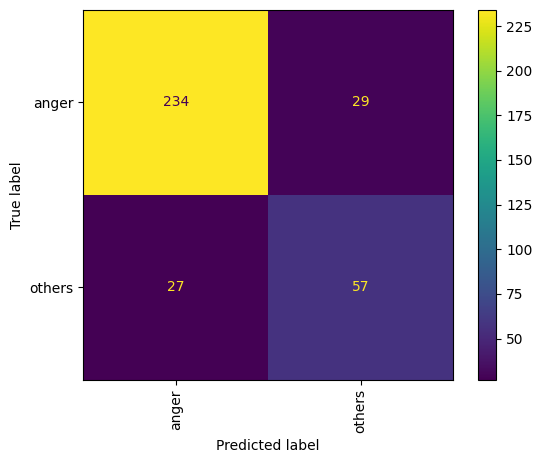

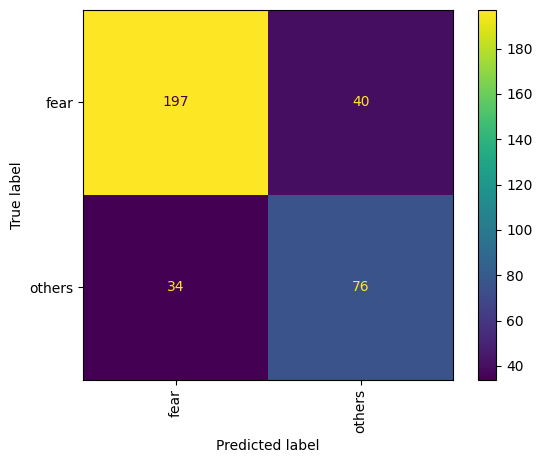

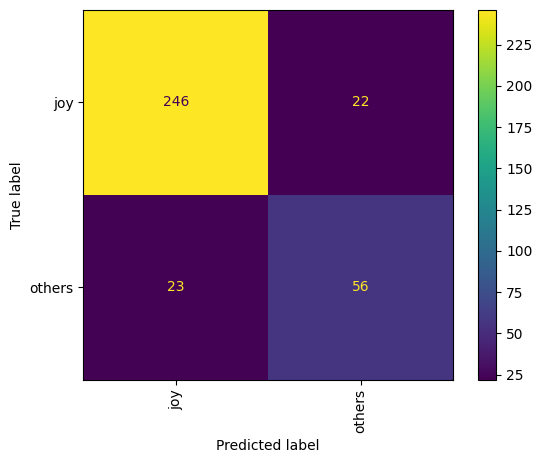

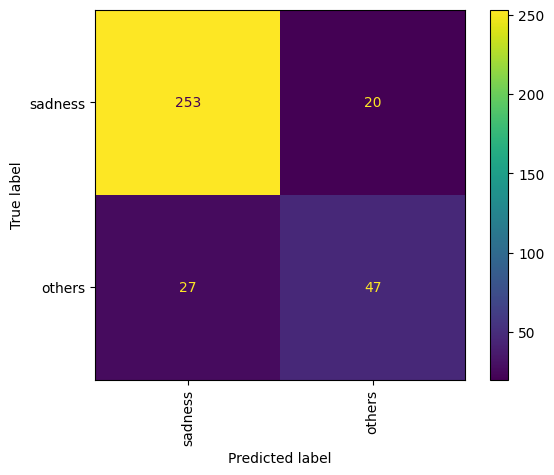

In [15]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
T = multilabel_confusion_matrix(y_test, y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
for t, label in zip(T, my_tags):
    disp = ConfusionMatrixDisplay(t, display_labels=[label, 'others'])
    disp.plot(include_values=True, cmap="viridis", ax=None, xticks_rotation="vertical")
    plt.show()

---
## ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [16]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'fear', 'joy', 'anger', 'joy', 'anger', 'sadness',
       'joy', 'joy'], dtype='<U7')

In [17]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.7


In [18]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

       anger       0.77      0.80      0.78       857
        fear       0.78      0.81      0.79      1147
         joy       0.87      0.80      0.83       823
     sadness       0.76      0.75      0.76       786

    accuracy                           0.79      3613
   macro avg       0.79      0.79      0.79      3613
weighted avg       0.79      0.79      0.79      3613



In [19]:
## precision, recall, f1-score,
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [20]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

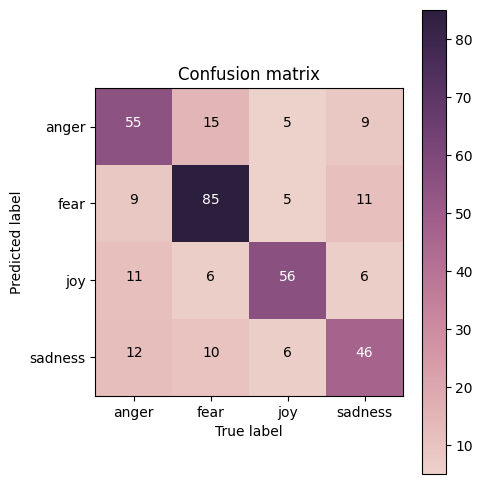

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
## ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

| Accuracy | DT | NB |
| :-----| :----: | :----: |
| Train | 0.99 | 0.79 |
| Test | 0.64 | 0.69 |

- Decision Tree: Obvious Overfitting

   -> I think that this situation happens due to greedy algorithm. Tuning hyperparameter such as max_depth, max_feature... can solve this problem.

- Naive Bayes: Underfitting

   -> The gap between NB and DT model is acceptable.

   -> The performance is not good enough, so NB model still need to improve...
   
   -> tuning hyperparameter, data preprocessing...


---
## Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

In [22]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [23]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2828    sadness
179       anger
1334       fear
2153        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [24]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [25]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [26]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 13s 89ms/step - loss: 1.3282 - accuracy: 0.3670 - val_loss: 1.2871 - val_accuracy: 0.4294
Epoch 2/25
113/113 [==============================] - 1s 8ms/step - loss: 0.9777 - accuracy: 0.6562 - val_loss: 0.9600 - val_accuracy: 0.6484
Epoch 3/25
113/113 [==============================] - 1s 12ms/step - loss: 0.5776 - accuracy: 0.7955 - val_loss: 0.8219 - val_accuracy: 0.6542
Epoch 4/25
113/113 [==============================] - 1s 8ms/step - loss: 0.4174 - accuracy: 0.8450 - val_loss: 0.8184 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 1s 8ms/step - loss: 0.3322 - accuracy: 0.8799 - val_loss: 0.8372 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 1s 8ms/step - loss: 0.2839 - accuracy: 0.8968 - val_loss: 0.8909 - val_accuracy: 0.6657
Epoch 7/25
113/113 [==============================] - 1s 6ms/step - loss: 0.2408 - accuracy: 0.9178 - val_loss: 0.9949 - val_accuracy: 0.6599
Epo

In [27]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.367008,1.328244,0.429395,1.287133
1,1,0.656241,0.977654,0.648415,0.959972
2,2,0.795461,0.577642,0.654179,0.821885
3,3,0.845004,0.417427,0.691643,0.818408
4,4,0.879878,0.332206,0.691643,0.837188
5,5,0.896762,0.283944,0.665706,0.890904
6,6,0.917797,0.240784,0.659942,0.994878
7,7,0.934127,0.203377,0.665706,0.986723
8,8,0.945198,0.168680,0.665706,1.084559
9,9,0.952948,0.152271,0.674352,1.127794


---
## ** >>> Exercise 6 (Take home):  **

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

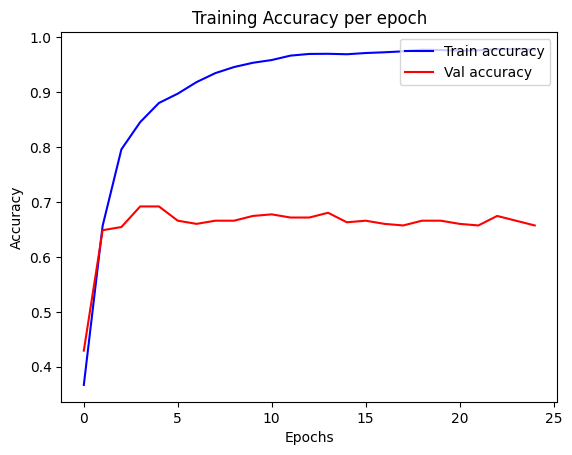

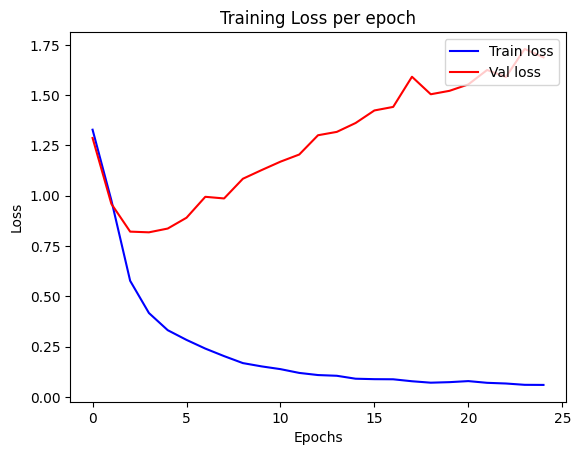

In [28]:
# Answer here
#acc
acc = pd.concat([training_log['accuracy'], training_log['val_accuracy']], axis=1)
acc = acc.set_axis(['Train accuracy','Val accuracy'], axis=1)
acc[acc.columns].plot(
    xlabel='Epochs',
    ylabel='Accuracy',
    title='Training Accuracy per epoch',
    color=['b', 'r'],
    )
plt.legend(loc='upper right')
plt.show()

loss = pd.concat([training_log['loss'], training_log['val_loss']], axis=1)
loss = loss.set_axis(['Train loss','Val loss'], axis=1)

loss[loss.columns].plot(
    xlabel='Epochs',
    ylabel='Loss',
    title='Training Loss per epoch',
    color=['b', 'r']
)
plt.legend(loc='upper right')
plt.show()

if we want to determine whether overfitting or not, should observe the validation curve.
accuracy : tend to be flatten out at epoch 3
loss : have the lowest value at epoch 3

=> model should be stop trainning at epoch 3



| epoch | situation |
| :-----: | :----: |
| < 3 | underfitting |
| = 3 | good |
| > 3 | overfitting |

---
## ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


- average of word2vec

- sum of word2vec

- doc2vec

---


##  High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

In [29]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/content/drive/MyDrive/DataMining/DM2023-Lab2-Master/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [30]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


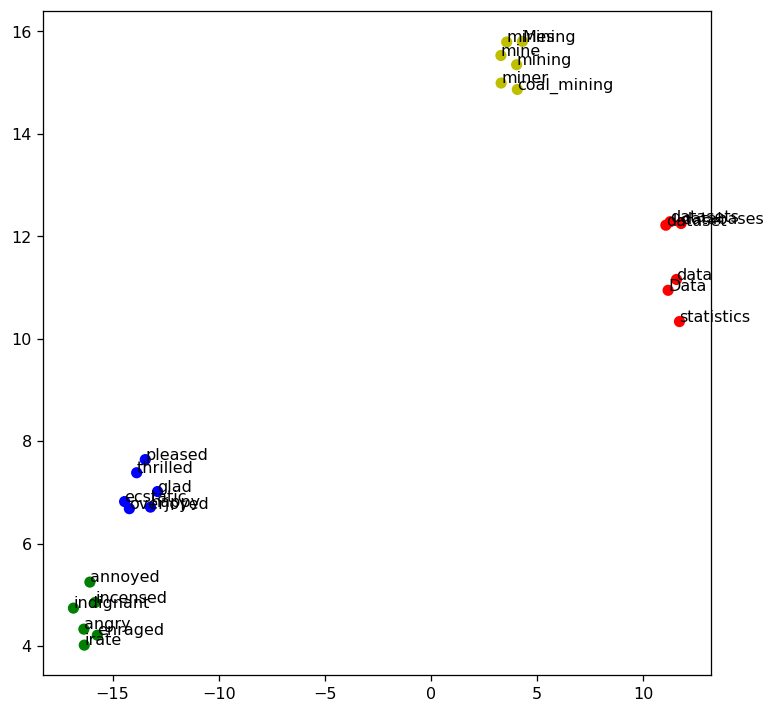

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
## ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [32]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
happy_words:  ['happy', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
fear_words:  ['fear', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['angry', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'di

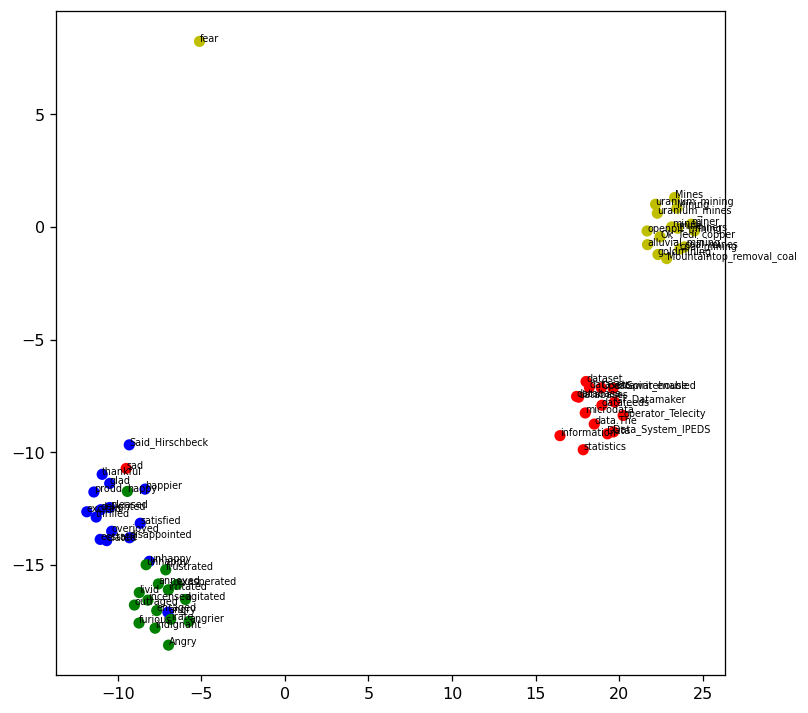

In [33]:
# Answer here
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=35)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points', fontsize=6)
plt.show()

---

# Part 2 : Kaggle Competition

Kaggle Name: helloworld111034508

Private scoreboard snapshot:

[Snapshot](pic0.png)

# Part 3 The Model of Competition

In [34]:
import pandas as pd
import json

## 3-0. prepare data

In [35]:
#loading file from kaggle
df_emotion=pd.read_csv('emotion.csv')
df_ident=pd.read_csv('data_identification.csv')
print(df_emotion.shape, df_ident.shape)

(1455563, 2) (1867535, 2)


In [36]:
df_ident.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [37]:
#read json file and transfroming into DataFrame
json_path = 'tweets_DM.json'
with open(json_path) as f:
    data = [json.loads(line) for line in f]
df = pd.json_normalize(data, meta=['_score', '_index',
                ['_source', 'tweet', 'hashtags'],
                ['_source', 'tweet', 'tweet_id'],
                ['_source', 'tweet', 'text'],
                '_crawldate', '_type'
                ])
df.columns = ['score', 'index', 'crawldate', 'type', 'hashtags', 'tweet_id', 'text']
df.head()

,score,index,crawldate,type,hashtags,tweet_id,text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [38]:
#in order to save memory
del data

In [39]:
#drop the column that meaningless to our propose
df=df.drop(labels=['index', 'crawldate', 'type', 'hashtags'], axis=1)
df.head()

,score,tweet_id,text
0,391,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,0x28b412,"Confident of your obedience, I write to you, k..."
3,376,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,0x2de201,"""Trust is not the same as faith. A friend is s..."


In [40]:
#merge all of our DataFrame by the same tweed_id
df_merge=pd.merge(df, df_ident, on='tweet_id', how='outer')
df_merge= pd.merge(df_merge, df_emotion, on='tweet_id', how= 'outer')
df_merge.head()

,score,tweet_id,text,identification,emotion
0,391,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,433,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,232,0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,376,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,989,0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN


In [41]:
#in order to save memory
del df, df_ident, df_emotion

## 3-1. preprocessing

In [42]:
from nltk.tokenize import word_tokenize
w=word_tokenize(df_merge['text'][0])
w

['People',
 'who',
 'post',
 '``',
 'add',
 'me',
 'on',
 '#',
 'Snapchat',
 "''",
 'must',
 'be',
 'dehydrated',
 '.',
 'Cuz',
 'man',
 '....',
 'that',
 "'s",
 '<',
 'LH',
 '>']

In [43]:
#doing preprocessing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    
    #將tweet常會出現的符號進行刪除
    text=re.sub('[<LH>"\'.,]','',text)
    text=re.sub('@\\w+ *','',text)
    
    #都轉換成小寫符號
    text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # stop word
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    words = [emotion_mapping.get(word, word) for word in words]

    processed_text = ' '.join(words)

    return processed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#將前處理後之文字存至text_after column
df_merge['text_after']=df_merge['text'].apply(preprocess_text)

In [ ]:
df_merge.head()

,score,tweet_id,text,identification,emotion,text_after
0,391,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation,people post add # snapchat must dehydrated cuz...
1,433,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness,see trump dangerous # freepress around world #...
2,232,0x28b412,"Confident of your obedience, I write to you, k...",test,NaN,confident obedience write knowing even ask ( p...
3,376,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear,issa stalking tasha 😂😂😂
4,989,0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN,trust faith friend someone trust putting faith...


In [ ]:
df_merge.to_pickle('/content/drive/MyDrive/DataMining/DM2023-Lab2-Master/Homework/dm2023-isa5810-lab2-homework/df_merge_after.pkl')

In [ ]:
df_merge = pd.read_pickle('/content/drive/MyDrive/DataMining/DM2023-Lab2-Master/Homework/dm2023-isa5810-lab2-homework/df_merge_after.pkl')

In [ ]:
import string
import re

In [ ]:
#前處理HTML標籤和編碼
def clean(raw):
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result) # greater than sign
    result = re.sub('&#x27;', "'", result) # apostrophe
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result) # paragraph tag
    result = re.sub('<i>', ' ', result) #italics tag
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub("\n", '', result) # newline
    return result

In [ ]:
#前處理emoji符號
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
#前處理標點符號以及數字
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', text)
    return text

In [ ]:
#移除"user"單詞
def remove_word_user(df):
    df['text_after_2'] = df['text_after'].apply(lambda x: " ".join(x for x in x.split() if x != 'user'))

In [ ]:
#使用上述前處理
def cleaning(df):
    df['text_after_2'] = df['text_after'].apply(clean)
    df['text_after_2'] = df['text_after'].apply(deEmojify)
    df['text_after_2'] = df['text_after'].apply(lambda x: remove_punct(x))
    remove_word_user(df)

In [ ]:
cleaning(df_merge)
df_merge.head(-5)

,score,tweet_id,text,identification,emotion,text_after,text_after_2
0,391,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation,people post add # snapchat must dehydrated cuz...,people post add # snapchat must dehydrated cuz...
1,433,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness,see trump dangerous # freepress around world #...,see trump dangerous # freepress around world #...
2,232,0x28b412,"Confident of your obedience, I write to you, k...",test,NaN,confident obedience write knowing even ask ( p...,confident obedience write knowing even ask ( p...
3,376,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear,issa stalking tasha 😂😂😂,issa stalking tasha 😂😂😂
4,989,0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN,trust faith friend someone trust putting faith...,trust faith friend someone trust putting faith...
...,...,...,...,...,...,...,...
1867525,602,0x2913b4,"""For this is the message that ye heard from th...",test,NaN,message ye heard beginning love one another jo...,message ye heard beginning love one another jo...
1867526,94,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy,im appy ! ! ! # nowonder name show ! # appy ! ...,im appy ! ! ! # nowonder name show ! # appy ! ...
1867527,627,0x38959e,In every circumtance I'd like to be thankful t...,train,joy,every circumtance id like thankful almighty je...,every circumtance id like thankful almighty je...
1867528,274,0x2cbca6,there's currently two girls walking around the...,train,joy,there currently two girl walking around librar...,there currently two girl walking around librar...


In [ ]:
df_merge.to_pickle('/content/drive/MyDrive/DataMining/DM2023-Lab2-Master/Homework/dm2023-isa5810-lab2-homework/df_merge_after_2.pkl')

In [ ]:
df_merge = pd.read_pickle('/content/drive/MyDrive/DataMining/DM2023-Lab2-Master/Homework/dm2023-isa5810-lab2-homework/df_merge_after_2.pkl')

## 3-2. feature engineering

### doc2vec

In [ ]:
df_merge.columns

Index(['score', 'tweet_id', 'text', 'identification', 'emotion', 'text_after',
       'text_after_2'],
      dtype='object')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#利用前面處理好的文字(text_after_2)
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = []
for index, row in df_merge.iterrows():
    tokens = word_tokenize(row['text_after_2'])
    tagged_data.append(TaggedDocument(words=tokens, tags=[str(index)]))

#訓練Doc2Vec模型, output vector的長度設定為200
model = Doc2Vec(vector_size=200, window=5, min_count=1, workers=4, epochs=10)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
#利用訓練好的doc2vec model將資料中的每個text轉換成vector
vectors = []
for index, row in df_merge.iterrows():
    tokens = word_tokenize(row['text_after_2'])
    vector = model.infer_vector(tokens)
    vectors.append(vector)

df_merge['doc2vec_vector'] = vectors

In [ ]:
df_merge.to_pickle('/content/drive/MyDrive/DataMining/DM2023-Lab2-Master/Homework/dm2023-isa5810-lab2-homework/df_merge_after_doc2_vec_200.pkl')

### consider score feature

In [ ]:
#make sure there isn't have any na in text column
df_merge['text_after_2'].isna().sum()

0

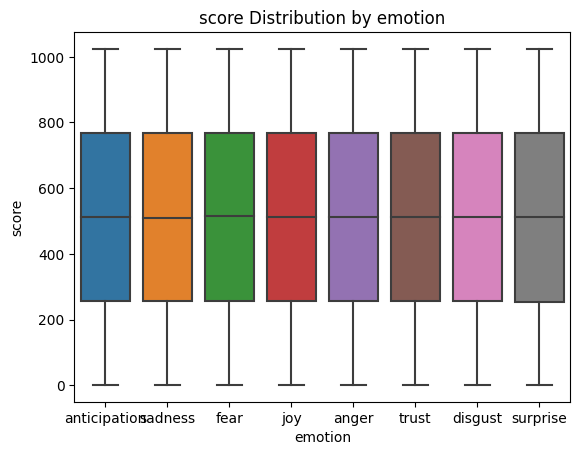

In [ ]:
#check the distribution of 'score' to decide whether delete this feature or not
import seaborn as sns

sns.boxplot(x='emotion', y='score', data=df_train)

plt.title('score Distribution by emotion')
plt.xlabel('emotion')
plt.ylabel('score')

plt.show()

In [ ]:
#發現每個class中score的distribution長得差不多, 因此推測不是關鍵feature, 刪除該feature
df_merge = df_merge.drop(labels=['score'], axis=1)

###  flatten doc2vec

In [4]:
df_merge = pd.read_pickle('df_merge_after_doc2_vec_200.pkl')

In [5]:
df_merge = df_merge.drop(labels=['text', 'text_after', 'text_after_2'], axis=1)

In [6]:
df_merge.columns

Index(['tweet_id', 'identification', 'emotion', 'doc2vec_vector'], dtype='object')

In [34]:
#將'doc2vec_vector'從在一個column, 扁平化成多個特徵
flattened_features = df_merge['doc2vec_vector'].apply(pd.Series)
df_merge_200 = pd.concat([df_merge['tweet_id'], df_merge['identification'], df_merge['emotion'], flattened_features], axis=1)

print("\n扁平化後的 DataFrame：")
df_merge_200.head()


扁平化後的 DataFrame：


,tweet_id,identification,emotion,0,1,2,3,4,5,6,...,190,191,192,193,194,195,196,197,198,199
0,0x376b20,train,anticipation,-0.077016,0.077544,0.056529,-0.009675,0.012382,-0.017672,0.040295,...,-0.022337,0.033020,0.065320,-0.009499,-0.024224,0.040227,-0.087150,-0.038350,0.044029,-0.000772
1,0x2d5350,train,sadness,0.026003,0.036538,-0.004361,-0.075988,-0.088319,-0.033952,-0.032056,...,0.052472,0.076540,-0.038920,0.023729,0.085535,0.009423,0.075477,-0.017852,0.024253,-0.010883
2,0x28b412,test,NaN,0.089893,0.023930,0.042118,0.055865,0.020280,-0.031921,-0.025729,...,-0.040705,0.076237,0.157931,-0.003403,-0.061307,0.033760,-0.024599,-0.031077,-0.043835,-0.009518
3,0x1cd5b0,train,fear,0.035153,-0.036092,0.005471,0.008875,-0.010860,0.008016,0.018822,...,0.057897,-0.008773,-0.008737,-0.003012,0.051660,0.022502,0.034068,-0.013777,-0.043555,0.018748
4,0x2de201,test,NaN,-0.031409,-0.020895,-0.079080,-0.002155,-0.015774,-0.141894,-0.110903,...,0.029904,0.009910,0.071656,-0.024971,0.113651,-0.020185,-0.007452,-0.103320,-0.021512,-0.043286


In [35]:
df_merge_200.shape

(1867535, 203)

### split train & test

In [36]:
#利用'identification'將df_merge分成train以及test, 並將該feature刪除
df_train = df_merge_200[df_merge_200['identification']=='train']
df_test = df_merge_200[df_merge['identification']=='test']
df_train = df_train.drop(labels=['identification'], axis=1)
df_test = df_test.drop(labels=['identification'], axis=1)
df_train.head()

,tweet_id,emotion,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,0x376b20,anticipation,-0.077016,0.077544,0.056529,-0.009675,0.012382,-0.017672,0.040295,0.056059,...,-0.022337,0.033020,0.065320,-0.009499,-0.024224,0.040227,-0.087150,-0.038350,0.044029,-0.000772
1,0x2d5350,sadness,0.026003,0.036538,-0.004361,-0.075988,-0.088319,-0.033952,-0.032056,0.084605,...,0.052472,0.076540,-0.038920,0.023729,0.085535,0.009423,0.075477,-0.017852,0.024253,-0.010883
3,0x1cd5b0,fear,0.035153,-0.036092,0.005471,0.008875,-0.010860,0.008016,0.018822,0.070277,...,0.057897,-0.008773,-0.008737,-0.003012,0.051660,0.022502,0.034068,-0.013777,-0.043555,0.018748
5,0x1d755c,joy,0.089868,-0.065137,0.077100,0.064799,0.153934,-0.055773,0.068612,0.066352,...,-0.021657,-0.047979,-0.035359,-0.052435,-0.029663,-0.041178,-0.072610,0.007360,-0.017852,-0.009419
6,0x2c91a8,anticipation,-0.003376,-0.034858,0.003600,0.022393,-0.005981,-0.050515,0.046564,0.076011,...,0.085031,-0.055233,-0.022347,-0.036434,0.016620,0.031227,0.022068,-0.029768,-0.011757,-0.027152


In [37]:
df_train['emotion'].isnull().value_counts()

emotion
False    1455563
Name: count, dtype: int64

In [38]:
df_test['emotion'].isnull().value_counts()

emotion
True    411972
Name: count, dtype: int64

In [11]:
del df_merge, df_merge_200

In [39]:
#切割成x以及y, 並把test data中能對應的'tweet_id' feature保留
x_train = df_train.drop(labels = ['emotion'], axis=1)
x_test = df_test.drop(labels = ['emotion'], axis=1)
y_train = df_train['emotion']
y_test = df_test['emotion']
tweet_id_test=df_test['tweet_id']
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)
del df_train, df_test

x_train.shape:  (1455563, 201)
y_train.shape:  (1455563,)
x_test.shape:  (411972, 201)
y_test.shape:  (411972,)


In [47]:
x_train = x_train.drop(labels = ['tweet_id'], axis=1)
x_test = x_test.drop(labels = ['tweet_id'], axis=1)
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (1455563, 200)
y_train.shape:  (1455563,)
x_test.shape:  (411972, 200)
y_test.shape:  (411972,)


In [49]:
x_train.to_pickle('x_train_doc2vec_200.pkl')
y_train.to_pickle('y_train.pkl')
x_test.to_pickle('x_test_doc2vec_200.pkl')
y_test.to_pickle('y_test.pkl')

## 3-3. model

In [15]:
#將xgboost的y label由文字轉換成數字encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

In [ ]:
np.savez('y_train_numeric', y_train_numeric)

In [6]:
#training
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate = 0.02, max_depth=10, n_estimators=250)
xgb_model.fit(x_train, y_train_numeric, verbose = 2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#prediction
y_train_pred=xgb_model.predict(x_train)
y_test_pred=xgb_model.predict(x_test)

In [16]:
#將train預測出來的轉換為text的class形式
y_train_pred_in = label_encoder.inverse_transform(y_train_pred)
y_train_pred_in

array(['joy', 'joy', 'fear', ..., 'joy', 'joy', 'joy'], dtype=object)

In [17]:
#觀察該model在train data中的分類表現
from sklearn.metrics import classification_report
print(classification_report(y_true=y_train, y_pred=y_train_pred_in))

              precision    recall  f1-score   support

       anger       0.95      0.19      0.31     39867
anticipation       0.76      0.37      0.50    248935
     disgust       0.55      0.23      0.33    139101
        fear       0.89      0.29      0.43     63999
         joy       0.45      0.94      0.61    516017
     sadness       0.59      0.34      0.43    193437
    surprise       0.91      0.20      0.32     48729
       trust       0.79      0.20      0.32    205478

    accuracy                           0.52   1455563
   macro avg       0.74      0.34      0.41   1455563
weighted avg       0.63      0.52      0.47   1455563



## 3-4. submission

In [18]:
tweet_id_test = pd.read_pickle('tweet_id_test.pkl')
tweet_id_test = pd.DataFrame(tweet_id_test)
tweet_id_test.columns

Index(['tweet_id'], dtype='object')

In [19]:
#將test預測出來的轉換為text的class形式
y_test_pred_in = label_encoder.inverse_transform(y_test_pred)
y_test_pred_in

array(['joy', 'anticipation', 'disgust', ..., 'joy', 'joy', 'joy'],
      dtype=object)

In [22]:
y_test_pred_in = pd.DataFrame(y_test_pred_in)

In [23]:
submission = pd.concat([tweet_id_test.reset_index()['tweet_id'], y_test_pred_in], ignore_index=True, axis=1)
submission = submission.rename(columns={0: "id", 1: "emotion"})
submission

,id,emotion
0,0x28b412,joy
1,0x2de201,anticipation
2,0x218443,disgust
3,0x2939d5,anticipation
4,0x26289a,trust
...,...,...
411967,0x2913b4,joy
411968,0x2a980e,anticipation
411969,0x316b80,joy
411970,0x29d0cb,joy


In [24]:
submission.to_csv('y_submit_5.csv',index=False)

## reflection

 - 文字模型的訓練需要很大量的memory也很吃電腦效能，希望我下次在做這些文字模型訓練的時候會有好一點的電腦能讓我做更多的嘗試

 - 不同的文字前處理對結果也會有很大的影響，像doc2vec的模型訓練出不同的vector長度，即使使用相同的模型對結果有差別，但沒有時間做更多的嘗試以及實驗去比較哪些參數會有最好的結果。還有試過一些pretrain的tokenizer。
 
 - 有試過可能是硬體問題，有嘗試使用深度學習模型進行訓練，也有把模型訓練出來，但是很遺憾的想要預測test data時會一直out of memory，沒有成功將深度學習模型的訓練結果派上用場。也試過random forest等的樹模型，也有使用grid search和optuna等方式來調整超參數。